In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

2024-04-15 18:44:17.064920: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 18:44:17.065028: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 18:44:17.203764: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
data = pd.read_csv('/kaggle/input/a-z-handwritten-data/A_Z Handwritten Data.csv')

***Renaming pixels***

In [3]:
data.columns = ['label'] + [f'pixel_{i}' for i in range(784)]

# *Quick peek on data*

In [4]:
data.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, label to pixel_783
dtypes: int64(785)
memory usage: 2.2 GB


In [6]:
data.shape

(372450, 785)

In [7]:
Y = data.label
X = data.drop('label', axis=1)

In [8]:
Y.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

*26 unique value [A-Z]*

In [9]:
letters =[chr(i) for i in range(65, 91)]
letters 

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

<BarContainer object of 26 artists>

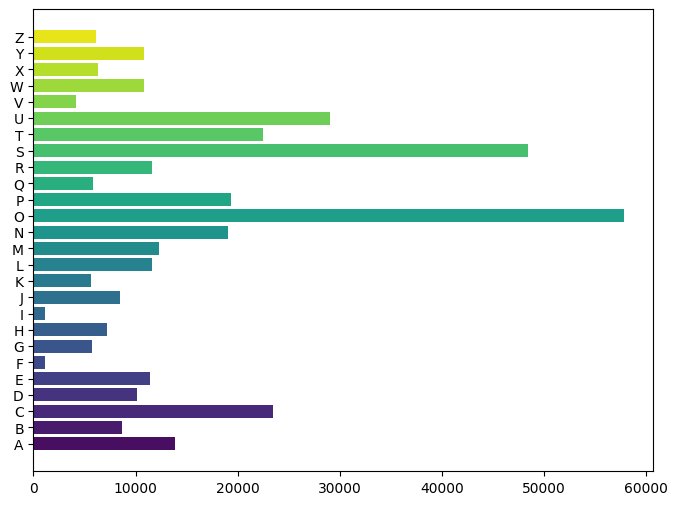

In [10]:
plt.figure(figsize=(8, 6))
plt.barh(letters, Y.value_counts().sort_index(), color=sns.color_palette('viridis', 26))

*The occurrence of O,S is high
while the occurrence of I,F is pretty low*

# *Visualizing random set of letters*

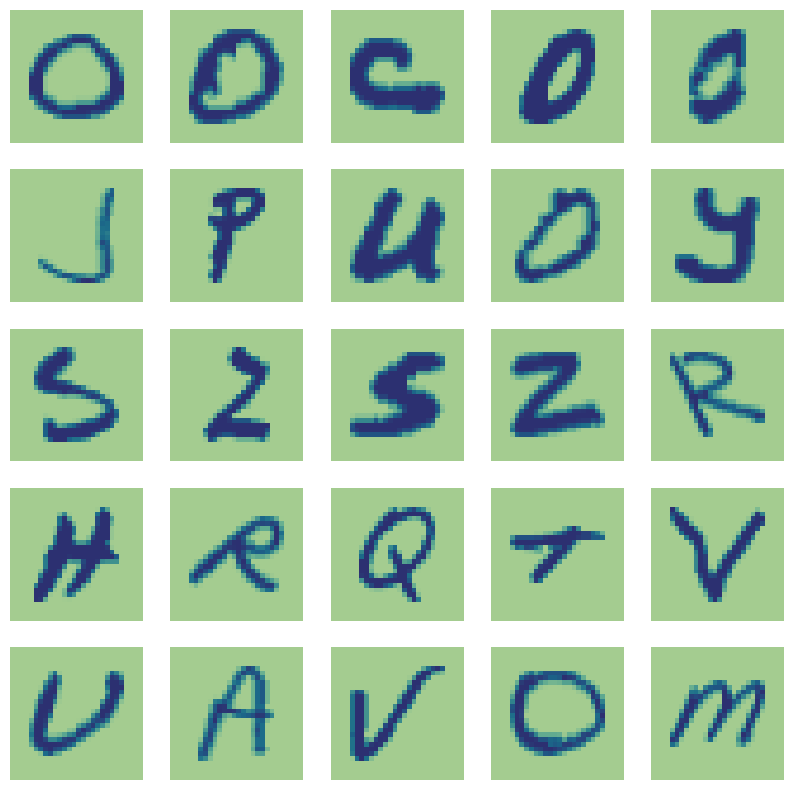

In [11]:
random_indices = np.random.choice(range(len(X)), size=25, replace=False)
_, axes = plt.subplots(5, 5, figsize=(10, 10))
for i,ax in enumerate(axes.ravel()):
    ax.imshow(X.iloc[random_indices[i]].values.reshape(28, 28), cmap='crest')
    ax.axis('off')
plt.show()

***Splitting into train,test***

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
x_train.shape, x_test.shape,

((260715, 784), (111735, 784))

# *✨Model✨*

In [13]:
model = Sequential()
model.add(InputLayer(shape=(x_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(26, activation='linear'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,426 (431.35 KB)

 Trainable params: 110,426 (431.35 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.4057 - loss: 7.5192 - val_accuracy: 0.7203 - val_loss: 1.0985
Epoch 2/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.7539 - loss: 0.9229 - val_accuracy: 0.8321 - val_loss: 0.5997
Epoch 3/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.8591 - loss: 0.5108 - val_accuracy: 0.8970 - val_loss: 0.3835
Epoch 4/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9099 - loss: 0.3281 - val_accuracy: 0.9217 - val_loss: 0.2964
Epoch 5/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9318 - loss: 0.2442 - val_accuracy: 0.9328 - val_loss: 0.2533
Epoch 6/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9446 - loss: 0.1997 - val_accuracy: 0.9449 - val_loss: 0.2065
Epoch 7/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.9531 - loss: 0.1656 - val_accuracy: 0.9491 - val_loss: 0.1894
Epoch 8/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.9594 - loss: 0

# *Plotting history*
* **histoy has this set of keys (['loss', 'accuracy', 'val_loss', 'val_accuracy'])**


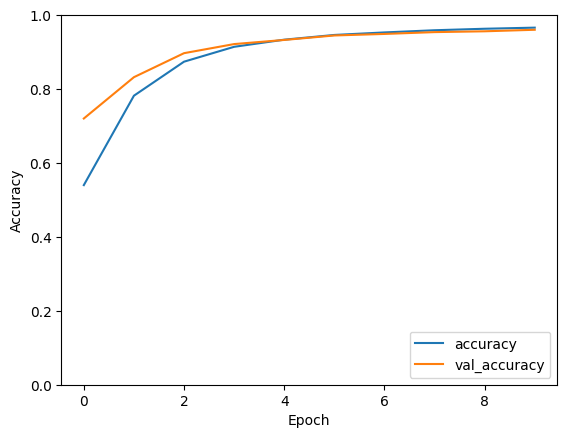

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

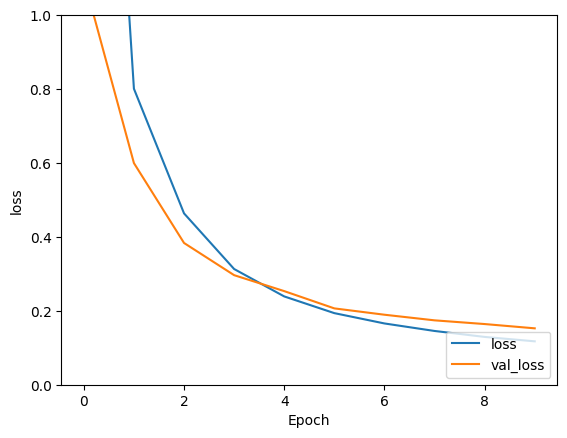

In [16]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


***Check the accuracy***

In [17]:
_,test_acc = model.evaluate(x_test, y_test)
print(f'Accuracy: {test_acc}')

3492/3492 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9598 - loss: 0.1561
Accuracy: 0.9603615403175354


In [18]:
z = model.predict(x_test)

3492/3492 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


***z (not probability) witch is y in the formula above***

In [19]:
print(z[0])

[  8.653815   -8.188434    7.329091    4.626009    7.582226    0.9336146
   1.6016619   5.09263   -68.5505    -12.726832   -6.457447   -9.855213
   5.3021255   5.57081    -0.8595668  24.624008    6.6351204  11.089839
   9.520955   12.672302   -2.2655716  -6.268264   -2.8657358 -18.142822
  13.927018   -6.6337748]


***Calculating the probability using softmax***

In [20]:
prediction = tf.nn.softmax(z)
print(prediction[0])

tf.Tensor(
[1.1593642e-07 5.6198366e-15 3.0824719e-08 2.0652178e-09 3.9704023e-08
 5.1449293e-11 1.0034796e-10 3.2931913e-09 0.0000000e+00 6.0078929e-17
 3.1730874e-14 1.0613313e-15 4.0606891e-09 5.3123648e-09 8.5626896e-12
 9.9996907e-01 1.5399687e-08 1.3248648e-06 2.7593956e-07 6.4480237e-06
 2.0988938e-12 3.8339185e-14 1.1517079e-12 2.6704722e-19 2.2612201e-05
 2.6601388e-14], shape=(26,), dtype=float32)


***To get the predicted class use argmax() it returns the index of the largest value***

In [21]:
prediction = np.argmax(prediction, axis=1)
prediction

array([15, 14, 11, ..., 14, 14, 24])

In [22]:
wrong_predictions = np.where(prediction != y_test)[0]
wrong_predictions.shape

(4429,)

# *Visualizing random set of wrong predictions*

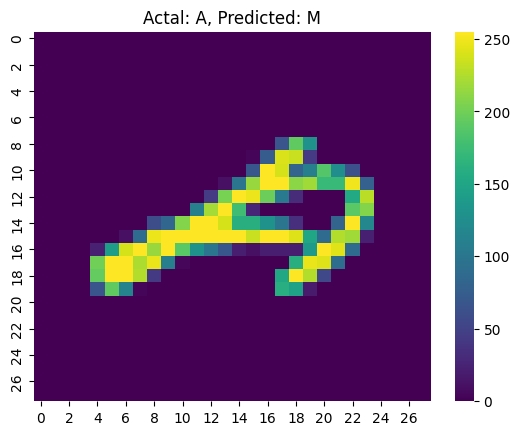

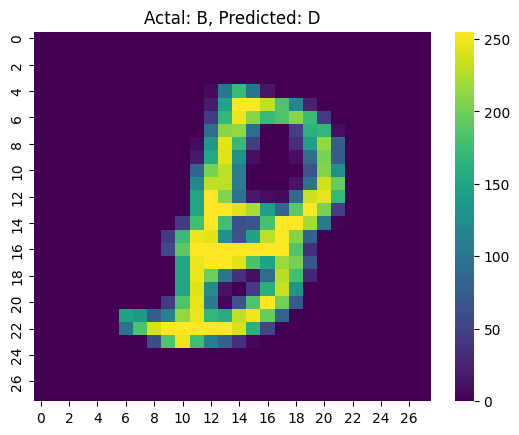

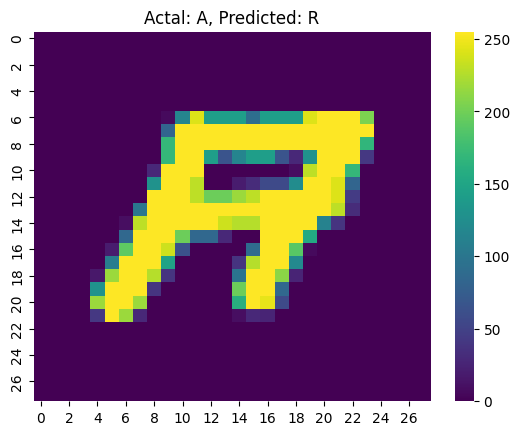

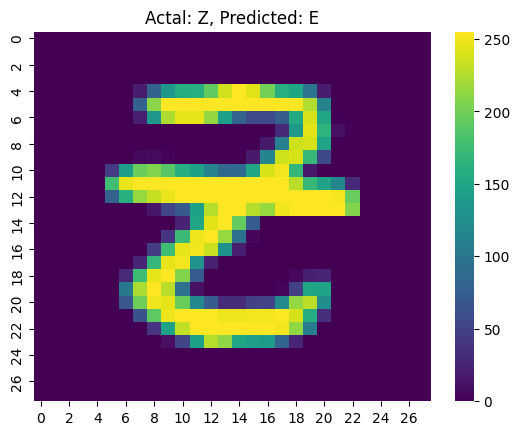

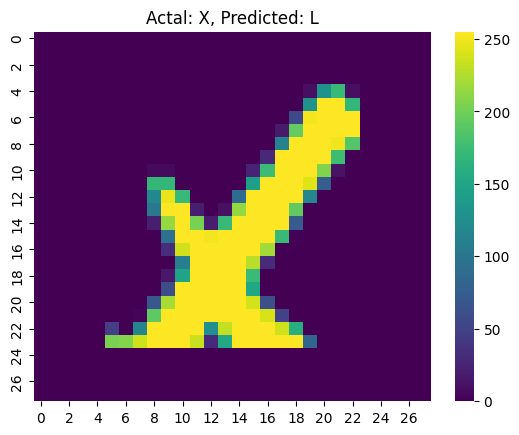

In [23]:
for i in range(5):
    sns.heatmap(x_test.iloc[wrong_predictions[i]].values.reshape(28, 28), cmap='viridis')
    plt.title(f'Actal: {chr(y_test.iloc[wrong_predictions[i]]+65)}, Predicted: {chr(prediction[wrong_predictions[i]]+65)}')
    plt.show()